## Download the kaggle dataset and put it in ./data/

[Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/download?datasetVersionNumber=1)

In [2]:
import zipfile
import os
import shutil

zip_location = './data/archive.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


os.remove("./data/archive.zip")
shutil.rmtree('./data/OriginalDataset') 


FileNotFoundError: [Errno 2] No such file or directory: './data/archive.zip'

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from pathlib import Path
import os.path

In [29]:
"""# Importing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='training', 
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='validation',
)

print("Class Names: ", train_ds.class_names)
print("Data Shape: ", train_ds.element_spec)"""

'# Importing the dataset\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\'./data/AugmentedAlzheimerDataset/\', \n\tlabels=\'inferred\', \n\tlabel_mode=\'int\', \n\timage_size=(256, 256), \n\tbatch_size=32, \n\tshuffle=True, \n\tseed=42, \n\tvalidation_split=0.2, \n\tsubset=\'training\', \n)\n\ntest_ds = tf.keras.preprocessing.image_dataset_from_directory(\'./data/AugmentedAlzheimerDataset/\', \n\tlabels=\'inferred\', \n\tlabel_mode=\'int\', \n\timage_size=(256, 256), \n\tbatch_size=32, \n\tshuffle=True, \n\tseed=42, \n\tvalidation_split=0.2, \n\tsubset=\'validation\',\n)\n\nprint("Class Names: ", train_ds.class_names)\nprint("Data Shape: ", train_ds.element_spec)'

In [30]:
data_dir = Path('./data/AugmentedAlzheimerDataset/');

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.2) # set validation split

train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

test_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.


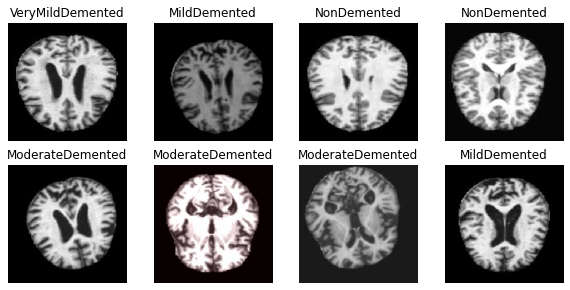

In [31]:
# Show the first 8 images and labels from the training set

plt.figure(figsize=(10, 10))
batch = train_ds.next()
for i in range(0, 8):
    image = batch[0][i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    labelIndex = list(batch[1][i]).index(1)
    # get the corresponding label from the train_ds.class_indices
    labels = list(train_ds.class_indices.keys())
    label = labels[labelIndex]
    plt.title(label)
    plt.axis('off')






In [64]:
MobileNetV3Small = keras.applications.MobileNetV3Large(
	input_shape=(224, 224, 3),
	include_top=False, 
	weights='imagenet')

# Create the model

model = keras.Sequential()

for layer in MobileNetV3Small.layers[:-10]:
	layer.trainable = False

model.add(MobileNetV3Small)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(4, activation='softmax'))
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 flatten_17 (Flatten)        (None, 47040)             0         
                                                                 
 dense_48 (Dense)            (None, 512)               24084992  
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                     

In [65]:
# Compile the model

model.compile(
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy'],
	loss='binary_crossentropy',
)

# Train the model
history = model.fit(
	train_ds,
	epochs=20, 
	steps_per_epoch=len(train_ds),
	validation_data=test_ds,
)


Epoch 1/20
850/850 [==============================] - 164s 189ms/step - loss: 0.4737 - accuracy: 0.5153 - val_loss: 2.5866 - val_accuracy: 0.1904
Epoch 2/20
850/850 [==============================] - 73s 86ms/step - loss: 0.3680 - accuracy: 0.6054 - val_loss: 1.1225 - val_accuracy: 0.3273
Epoch 3/20
850/850 [==============================] - 74s 87ms/step - loss: 0.3430 - accuracy: 0.6321 - val_loss: 1.3016 - val_accuracy: 0.2934
Epoch 4/20
850/850 [==============================] - 73s 86ms/step - loss: 0.3202 - accuracy: 0.6647 - val_loss: 2.1772 - val_accuracy: 0.2916
Epoch 5/20
850/850 [==============================] - 72s 85ms/step - loss: 0.3023 - accuracy: 0.6873 - val_loss: 1.6161 - val_accuracy: 0.3604
Epoch 6/20
850/850 [==============================] - 72s 85ms/step - loss: 0.2864 - accuracy: 0.7083 - val_loss: 4.7346 - val_accuracy: 0.2671
Epoch 7/20
850/850 [==============================] - 76s 89ms/step - loss: 0.2697 - accuracy: 0.7269 - val_loss: 5.2676 - val_accurac

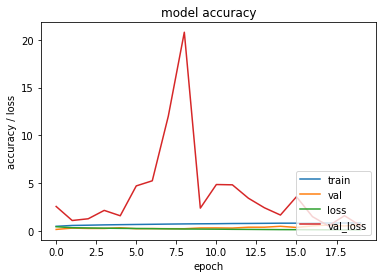

In [66]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='lower right')
plt.show()

In [73]:
# Make all of the model layers trainable
for layer in model.layers:
	layer.trainable = True

model.compile(optimizer=keras.optimizers.Adam(0.000001),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(
  train_ds,
  epochs=20,
  steps_per_epoch=len(train_ds),
  validation_data=test_ds,
)

Epoch 1/20


c:\Users\mlg\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


850/850 [==============================] - 202s 232ms/step - loss: 0.3189 - accuracy: 0.6876 - val_loss: 0.3040 - val_accuracy: 0.7006
Epoch 2/20
850/850 [==============================] - 187s 220ms/step - loss: 0.3104 - accuracy: 0.6985 - val_loss: 0.2972 - val_accuracy: 0.7104
Epoch 3/20
850/850 [==============================] - 189s 222ms/step - loss: 0.2998 - accuracy: 0.7092 - val_loss: 0.2900 - val_accuracy: 0.7188
Epoch 4/20
850/850 [==============================] - 188s 221ms/step - loss: 0.2921 - accuracy: 0.7189 - val_loss: 0.2825 - val_accuracy: 0.7287
Epoch 5/20
850/850 [==============================] - 188s 221ms/step - loss: 0.2841 - accuracy: 0.7345 - val_loss: 0.2795 - val_accuracy: 0.7344
Epoch 6/20
850/850 [==============================] - 188s 221ms/step - loss: 0.2765 - accuracy: 0.7421 - val_loss: 0.2707 - val_accuracy: 0.7429
Epoch 7/20
850/850 [==============================] - 192s 226ms/step - loss: 0.2691 - accuracy: 0.7511 - val_loss: 0.2641 - val_accura

KeyboardInterrupt: 

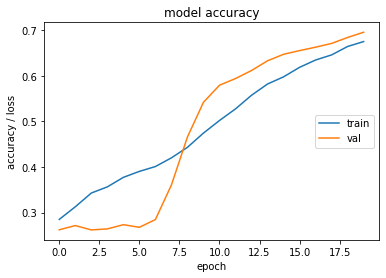

In [68]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
"""plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])"""
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center right')#, 'loss', 'val_loss'
plt.show()

In [69]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 flatten_17 (Flatten)        (None, 47040)             0         
                                                                 
 dense_48 (Dense)            (None, 512)               24084992  
                                                                 
 dropout_31 (Dropout)        (None, 512)               0         
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                     

In [70]:
# Save the model
model.save('./model-v3Large')

INFO:tensorflow:Assets written to: ./model-v3Large\assets


INFO:tensorflow:Assets written to: ./model-v3Large\assets


1/1 [==============================] - 0s 24ms/step


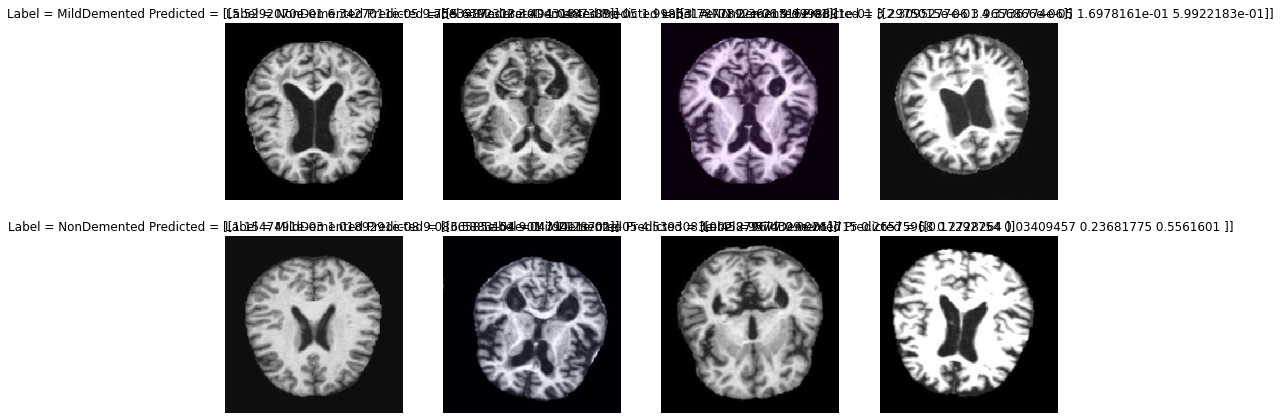

In [71]:
# Check the accuracy across the 4 classes

plt.figure(figsize=(15, 15))
batch = train_ds.next()
for i in range(0, 8):
    image = batch[0][i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    labelIndex = list(batch[1][i]).index(1)
    # get the corresponding label from the train_ds.class_indices
    labels = list(train_ds.class_indices.keys())
    label = labels[labelIndex]
    predicted = model.predict(image.reshape(1,224,224,3))
    plt.title("Label = " + label + " Predicted = " + str(predicted))
    plt.axis('off')



In [72]:
# Create a new model from scratch

"""model = keras.Sequential([
	keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
	keras.layers.MaxPooling2D(),
	keras.layers.Conv2D(64, 3, activation='relu'),
	keras.layers.MaxPooling2D(),
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])"""
"""
# Resize the test and train image data
test_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
train_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_ds_scaled,
    validation_data=test_ds_scaled,
    epochs=10)"""

"\n# Resize the test and train image data\ntest_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))\ntrain_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))\n\nmodel = tf.keras.models.Sequential([\n    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Conv2D(32, (3,3), activation = 'relu'),\n    keras.layers.MaxPooling2D(2,2),\n    keras.layers.Flatten(),\n    keras.layers.Dense(512, activation = 'relu'),\n    keras.layers.Dropout(0.2),\n    keras.layers.Dense(1, activation = 'softmax')\n])\nmodel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])\nhistory = model.fit(train_ds_scaled,\n    validation_data=test_ds_